# Exercices

With each exercice will teach you one aspect of deep learning.
The process of machine learning can be decompose in 7 steps :

0. Data acquisition
1. Data preparation
2. Model definition
3. Model training
4. Model evaluation
5. Hyperparameter tuning
6. Prediction

In [1]:
from __future__ import print_function
import torch

## 2 - Model definition

from https://pytorch.org/tutorials/beginner/blitz/tensor_tutorial.html


### Tensors

#### Initialization of tensors

In [5]:
x = torch.empty(5, 3)
print(x)

tensor([[ 0.0000e+00,  3.6893e+19, -2.9298e+25],
        [ 4.6577e-10,  7.0065e-45,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00],
        [ 0.0000e+00,  0.0000e+00,  0.0000e+00]])


In [6]:
x = torch.rand(5, 3)
print(x)

tensor([[0.7899, 0.8925, 0.1289],
        [0.6076, 0.8531, 0.2062],
        [0.3443, 0.0593, 0.8041],
        [0.0268, 0.6153, 0.6731],
        [0.1644, 0.1345, 0.6655]])


In [7]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [8]:
x = torch.tensor([5.5, 3])
print(x)

tensor([5.5000, 3.0000])


In [9]:
x = x.new_ones(5, 3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[ 0.8474,  0.6569,  1.3365],
        [ 2.2769, -0.3193,  0.7688],
        [-1.6104, -0.6322,  1.9083],
        [ 0.5945,  0.9405, -1.0940],
        [-1.1254, -0.8179,  0.1125]])


In [10]:
print(x.size())

torch.Size([5, 3])


#### Tensors operations

In [13]:
y = torch.randn_like(x, dtype=torch.float) 
print(torch.add(x, y))

tensor([[ 0.2006,  2.1374,  1.2752],
        [ 1.6628, -0.2835,  1.8440],
        [-1.3281, -2.5315,  0.0241],
        [ 0.9772,  2.2147, -2.0587],
        [ 0.6177, -0.4970,  0.4687]])


In [15]:
result = torch.empty(5, 3)
torch.sub(x, y, out=result)
print(result)

tensor([[ 1.4941, -0.8236,  1.3978],
        [ 2.8910, -0.3550, -0.3064],
        [-1.8927,  1.2671,  3.7926],
        [ 0.2119, -0.3338, -0.1292],
        [-2.8686, -1.1388, -0.2438]])


In [16]:
print(x[:, 1])

tensor([ 0.6569, -0.3193, -0.6322,  0.9405, -0.8179])


In [17]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [18]:
x = torch.randn(1)
print(x)
print(x.item()) # get value as number

tensor([0.5791])
0.5790753364562988


#### Tensors bridge to numpy

In [20]:
a = torch.ones(5)
print(a)
b = a.numpy() # numpy view to a (reference)
print(b)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]


In [21]:
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [24]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a) # data copied (value transfer)
np.add(a, 1, out=a)
print(a)
print(b)
a = a + 1
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
[3. 3. 3. 3. 3.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


#### Load in GPU

In [25]:
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!
    

### Autograd of tensors

In [34]:
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [35]:
y = x + 2
print(y)

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [36]:
print(y.grad_fn)

In [37]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward1>)


In [38]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)

False
True


In [39]:
out.backward()
print(x.grad)

tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


In [40]:
out.backward()

RuntimeError: Trying to backward through the graph a second time, but the buffers have already been freed. Specify retain_graph=True when calling backward the first time.

In [41]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-514.4763,  838.6010, -314.9917], grad_fn=<MulBackward0>)


In [42]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([2.0480e+02, 2.0480e+03, 2.0480e-01])


In [43]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


# Building neural network from scratch

### LeNet architecture
http://yann.lecun.com/exdb/lenet/

In [44]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square you can only specify a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [45]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 5, 5])


In [46]:
print(params)

[Parameter containing:
tensor([[[[-0.1768,  0.0691, -0.0194, -0.0414,  0.1505],
          [-0.1618, -0.0906,  0.1288, -0.1588,  0.1118],
          [ 0.1599,  0.0992, -0.1064, -0.1610, -0.1971],
          [ 0.0050, -0.1176, -0.1020,  0.1317, -0.0016],
          [-0.0846, -0.1265,  0.1330, -0.0903, -0.1740]]],


        [[[ 0.1125,  0.1146, -0.0584,  0.1401, -0.1867],
          [-0.1709,  0.0494,  0.1646,  0.0698,  0.1267],
          [ 0.1526, -0.1903, -0.0193,  0.1925,  0.1573],
          [ 0.1570,  0.0076,  0.0366, -0.0802, -0.0771],
          [-0.0801, -0.0424, -0.0342, -0.1955, -0.1852]]],


        [[[ 0.0860,  0.0467, -0.0605,  0.1026, -0.1290],
          [ 0.1350,  0.1277,  0.1321, -0.0317,  0.0538],
          [-0.1535,  0.1205,  0.0833, -0.0736, -0.0852],
          [ 0.1365, -0.0912, -0.1686,  0.1459, -0.1810],
          [-0.1983, -0.0527,  0.0910,  0.1735, -0.0492]]],


        [[[-0.1496,  0.1882,  0.1993,  0.1912, -0.1343],
          [-0.1130, -0.0100, -0.0477, -0.0026,  0.197

In [47]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[ 0.0237,  0.1001,  0.1300, -0.0527, -0.0050,  0.0263, -0.0949,  0.0689,
         -0.0995,  0.0094]], grad_fn=<AddmmBackward>)


In [54]:
import torchvision.datasets as dset
import torchvision.transforms as transforms

data_path = './data'

trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (1.0,))])
# if not exist, download mnist dataset
train_set = dset.MNIST(root=data_path, train=True, transform=trans, download=True)
test_set = dset.MNIST(root=data_path, train=False, transform=trans, download=True)

Processing...
Done!


<class 'numpy.ndarray'> (768, 1024, 3)
<class 'torch.Tensor'> torch.Size([768, 1024, 3])
<class 'torch.Tensor'> torch.Size([3, 768, 1024])
<class 'torch.Tensor'> torch.Size([768, 1024, 3])


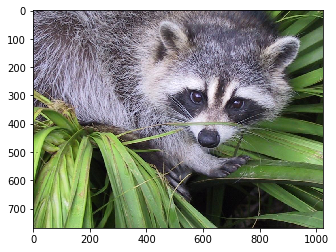

In [86]:
from scipy.misc import face
import matplotlib.pyplot as plt
import torch

np_image = face()
print(type(np_image), np_image.shape)
tensor_image = torch.from_numpy(np_image)
print(type(tensor_image), tensor_image.shape)
# reshape to channel first:
tensor_image = tensor_image.view(tensor_image.shape[2], tensor_image.shape[0], tensor_image.shape[1])
print(type(tensor_image), tensor_image.shape)

# If you try to plot image with shape (C, H, W)
# You will get TypeError:
# plt.imshow(tensor_image)

# So we need to reshape it to (H, W, C):
tensor_image = tensor_image.view(tensor_image.shape[1], tensor_image.shape[2], tensor_image.shape[0])
print(type(tensor_image), tensor_image.shape)

plt.imshow(tensor_image)
plt.show()

<class 'torch.Tensor'> torch.Size([1, 28, 28])
2
<class 'torch.Tensor'> torch.Size([28, 1, 28])
<class 'torch.Tensor'> torch.Size([1, 28, 28])


TypeError: Invalid dimensions for image data

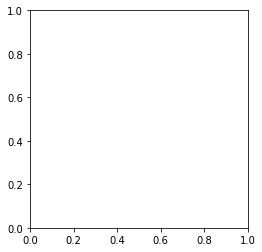

In [85]:
import matplotlib.pyplot as plt
import random

fig = plt.figure()

sample = train_set[random.randint(1,len(train_set))]
print(type(sample[0]), sample[0].shape)
print(sample[1].item())

tensor_image = sample[0].view(sample[0].shape[2], sample[0].shape[0], sample[0].shape[1])
print(type(tensor_image), tensor_image.shape)
tensor_image = tensor_image.view(tensor_image.shape[1], tensor_image.shape[2], tensor_image.shape[0])
print(type(tensor_image), tensor_image.shape)

plt.imshow(tensor_image, cmap='gray', interpolation='none')
plt.title("Ground Truth: {}".format(example_targets[i]))

plt.axis('off')
plt.ioff()
plt.show()